# Data

In [38]:
chip_weights = [193, 212, 174, 200, 195, 195, 194, 198, 181, 203]
ball_bearing_radius = [2.99, 2.99, 2.70, 2.92, 2.88, 2.92, 2.82, 2.83, 3.06, 2.85]
user_ratings = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
mileage = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]


# Hypothesis Test for mean

## Known Variance (z-test)

### Two-tailed z-test


## norm.ppf gives the z values from alpha(probability)
## norm.cdf gives the probability(alpha) values from z 

## norm.ppf is inverse of norm.cdf

In [83]:
from math import sqrt
import numpy as np
from scipy.stats import norm

#Given
mu_0 = 200
sigma = 10

#Collect Sample
sample = chip_weights
#sample = ball_bearing_radius

n = len(sample)
#Compute mean
mean = np.mean(sample)
#Compute test statistic
z = (mean - mu_0)/(sigma/sqrt(n))
#Set alpha
alpha = 0.05


# Gives the z value for alpha - norm.ppf
z_critical = norm.ppf(1 - alpha/2)

# Gives the probability of z values - norm.cdf
p_value = 2 * (1.0 - norm.cdf(np.abs(z)))


print(z, z_critical)

p_value = float("{:.4f}".format(p_value))

if (np.abs(z) >  z_critical) :
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else :
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


-1.7392527130926088 1.959963984540054
Not enough evidence to reject Null Hypothesis: p_value =  0.082  alpha =  0.05
0.08199032100038295 0.08791027972253791


### One-tailed z-test

In [51]:
from math import sqrt
import numpy as np
from scipy.stats import norm

#Given
mu_0 = 4
sigma = 0.5

#Collect Sample
#sample = chip_weights
sample = user_ratings

n = len(sample)
#Compute mean
mean = np.mean(sample)
#Compute test statistic
z = (mean - mu_0)/(sigma/sqrt(n))
#Set alpha
alpha = 0.05

z_critical = norm.ppf(1 - alpha)
p_value = (1.0 - norm.cdf(np.abs(z)))

print(mean, z, z_critical)

p_value = float("{:.4f}".format(p_value))

if (np.abs(z) >  z_critical) :
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else :
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)



4.25 2.23606797749979 1.6448536269514722
Reject Null Hypothesis: p-value =  0.0127  alpha =  0.05


## Unknown variance (t-test)

### Two-tailed t-test

In [53]:
from math import sqrt
import numpy as np
from scipy.stats import t

#Given
mu_0 = 200

#Collect Sample
sample = chip_weights

n = len(sample)
#Compute mean
mean = np.mean(sample)
# ddof = 1 means dividing by n-1 samples - for sample variance
stddev = np.std(sample, ddof=1)
#Compute test statistic
t_statistic = (mean - mu_0)/(stddev/sqrt(n))

#Set alpha
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, n-1)
p_value = 2 * (1.0 - t.cdf(np.abs(t_statistic), n-1))

print(mean, stddev, t_statistic, t_critical)

p_value = float("{:.4f}".format(p_value))

if (np.abs(t_statistic) >  t_critical) :
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else :
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)

194.5 10.67967956240053 -1.628562638916544 2.2621571627409915
Not enough evidence to reject Null Hypothesis: p_value =  0.1378  alpha =  0.05


### One-tailed t-test

In [66]:
from math import sqrt
import numpy as np
from scipy.stats import t

#Given
mu_0 = 4

#Collect Sample
sample = user_ratings

n = len(sample)
#Compute mean
mean = np.mean(sample)
stddev = np.std(sample, ddof=1)
#Compute test statistic
t_statistic = (mean - mu_0)/(stddev/sqrt(n))

#Set alpha
alpha = 0.05
t_critical = t.ppf(1 - alpha, n-1)
p_value = (1.0 - t.cdf(np.abs(t_statistic), n-1))

print(n, t_statistic, t_critical, stddev)
p_value = float("{:.4f}".format(p_value))

if (np.abs(t_statistic) >  t_critical) :
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else :
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


20 1.3142574813455419 1.729132811521367 0.8506963092234007
Not enough evidence to reject Null Hypothesis: p_value =  0.1022  alpha =  0.05


# Plotting distributions

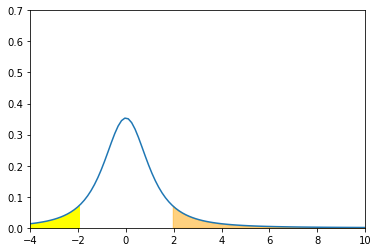

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

x_min =  -4 
x_max = 10

mean = 0 
std = 1

x = np.linspace(x_min, x_max, 100)
y1 = norm.pdf(x, mean, std)
y2 = t.pdf(x, 2)
y3 = chi2.pdf(x, 4)

ax = plt.gca()

plt.xlim(x_min,x_max)
plt.ylim(0,0.7)

#plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)

x1 = np.linspace(-4, -1.96, 100)
#y1 = norm.pdf(x1)
y1 = t.pdf(x1, 2)
#y1 = chi2.pdf(x1, 4)
plt.fill_between(x1, y1, color='yellow')

x2 = np.linspace(1.96, 10, 100)
#y2 = norm.pdf(x2)
y2 = t.pdf(x2, 2)
#y2 = chi2.pdf(x2, 4)
plt.fill_between(x2, y2, color='orange', alpha=0.5)

#plt.plot(x,y2)
#plt.plot(x,y3)

plt.savefig("normal_dist.png", dpi=400, transparent=True)
plt.show()


In [114]:
norm.cdf(0.49)

0.6879330505826095